In [38]:
# In the terminal
# python -m venv .venv
# !.\.venv\Scripts\activate
# !pip install ipykernel
# !pip install openai
# !pip install python-dotenv
# !pip install -U scikit-learn
# !pip install matplotlib

from dotenv import load_dotenv
import os
from openai import AzureOpenAI
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cityblock
from sklearn.metrics import jaccard_score
import numpy as np

# Load variables from .env file
load_dotenv()

# Access the variables
openai_endpoint = os.environ.get('OPENAI_ENDPOINT')
openai_key = os.environ.get('OPENAI_KEY')

# Create an instance of the OpenAI client
openai_client = AzureOpenAI(
  api_key = openai_key,
  api_version = "2024-02-01",
  azure_endpoint = openai_endpoint
)

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return np.array(openai_client.embeddings.create(input = [text], model=model).data[0].embedding)

def plot_graph(distances, labels, title):
  # Graph
  max_value = max(distances) + max(distances) * 0.1  # Calculate the maximum value for the x-axis

  x_values = [0] + distances + [max_value]
  y_values = [0] * len(x_values)
  c_values = ['k'] + ['b'] * len(distances) + ['k']

  # Define the x-axis positions and labels
  x_positions = [0, 1] + list(range(2, len(distances) + 2))
  x_labels = labels + [max_value]

  plt.figure(figsize=(10, 2))  # Set the figure size
  plt.scatter(x_values, y_values, c=c_values)  # Plot the points
  plt.plot([0, max_value], [0, 0], 'k-')  # Draw a black line between the points (0, 0) and (1, 0)
  plt.yticks([])  # Hide the y-axis
  plt.xticks(x_values, x_labels, rotation='vertical')  # Label the x-axis with the names of the distances
  plt.title(title)  # Set the title of the plot
  plt.show()
  
def plot_similarities(texts):
  embeddings = []
  labels = []
  for item in texts:
      embedding = get_embedding(item[0])
      labels.append(item[1])
      embeddings.append(embedding)
  plot_embeddings(embeddings, labels)

def plot_embeddings(embeddings, labels):
  first_embedding = np.array(embeddings[0]).reshape(1, -1)
  distances_cosin = []
  distances_eucl = []
  distances_manh = []
  distances_jacc = []
  distances_dot = []
  for embedding in embeddings[1:]:
      distances_eucl.append(np.linalg.norm(embeddings[0]-embedding))
      distances_cosin.append(1-cosine_similarity(first_embedding, np.array(embedding).reshape(1, -1))[0][0])
      distances_manh.append(cityblock(first_embedding.flatten(), embedding))
      # Convert embeddings to binary for Jaccard similarity
      bin_first_embedding = [1 if i > 0 else 0 for i in first_embedding.flatten()]
      bin_embedding = [1 if i > 0 else 0 for i in embedding]
      distances_jacc.append(jaccard_score(bin_first_embedding, bin_embedding))
      distances_dot.append(np.dot(first_embedding.flatten(), embedding))


  plot_graph(distances_cosin, labels, "Cosine Similarity")
  # plot_graph(distances_eucl, labels, "Euclidean Distance")
  # plot_graph(distances_manh, labels, "Manhattan Distance")
  # plot_graph(distances_jacc, labels, "Jaccard Similarity")
  # plot_graph(distances_dot, labels, "Dots Product")

In [39]:
print(get_embedding("beer"))

[-0.00280332 -0.01930623 -0.01028382 ... -0.0185361   0.0166639
 -0.00074689]


[-0.00453592 -0.00674618 -0.00253375 ... -0.0040638  -0.01860533
 -0.01121915]
[-0.00969327 -0.01276921 -0.00034086 ... -0.00957185 -0.00453971
 -0.00221421]
[ 0.00577461 -0.02914001  0.01937516 ... -0.00569031 -0.0045663
  0.00291189]
[ 0.01093196 -0.02311698  0.01718226 ... -0.00018226 -0.01863192
 -0.00609305]


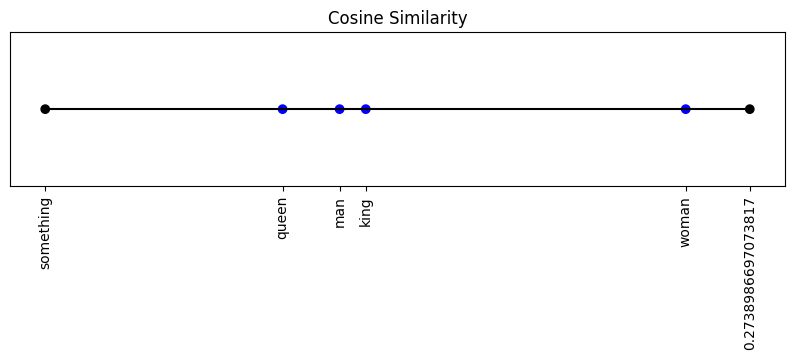

In [72]:
queen = get_embedding("queen")
woman = get_embedding("woman")
man = get_embedding("man")
something = queen - woman + man

print(queen)
print(woman)
print(man)
print(something)

king = get_embedding("king")

plot_embeddings([queen  , man  , woman  ,  something, king],
                ["queen", "man", "woman", "something", "king"])

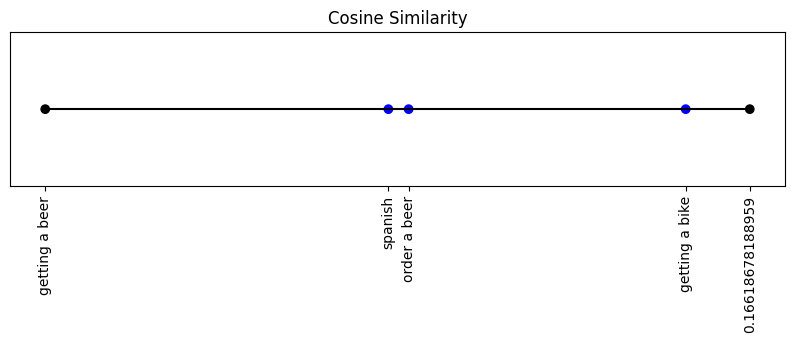

In [65]:
texts = [
    ["I would like to get a beer please", "getting a beer"],
    ["I would like to get a bike", "getting a bike"],
    ["He is ordering a beer", "order a beer"],
    ["Me gustaria tomar una cerveza por favor", "spanish"],
]

plot_similarities(texts)

[-0.00453592 -0.00674618 -0.00253375 ... -0.0040638  -0.01860533
 -0.01121915]
[-0.00969327 -0.01276921 -0.00034086 ... -0.00957185 -0.00453971
 -0.00221421]
[ 0.00577461 -0.02914001  0.01937516 ... -0.00569031 -0.0045663
  0.00291189]
[ 0.01093196 -0.02311698  0.01718226 ... -0.00018226 -0.01863192
 -0.00609305]


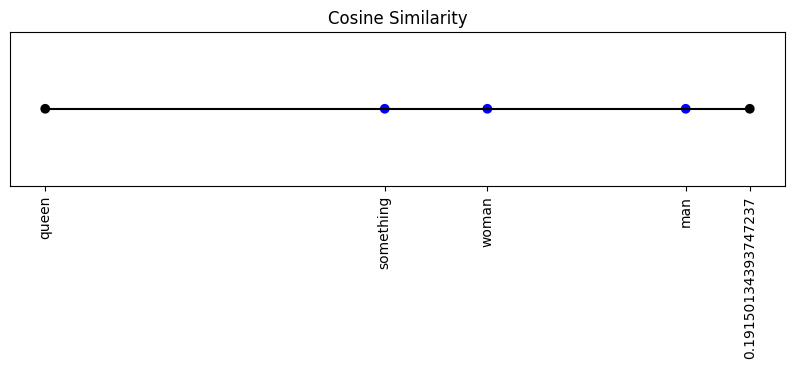

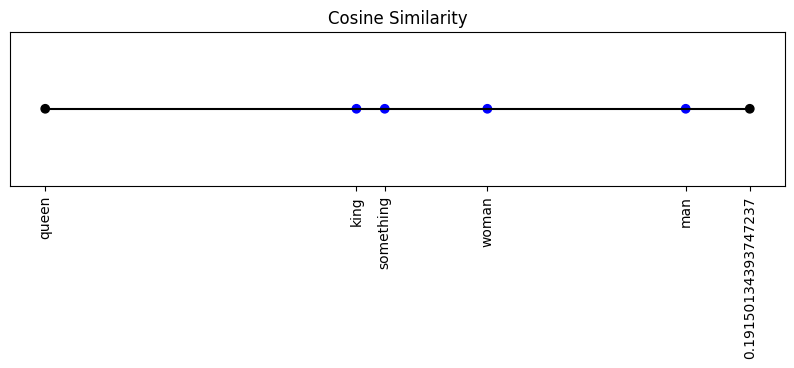